### Project 1 - Nhóm thực hiện: 19
### Thành viên
1. Nguyễn Phú Sang
2. Lâm Phát Đạt
3. Đồng Văn Xướng

#### Khai báo thư viện

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Checkred Board

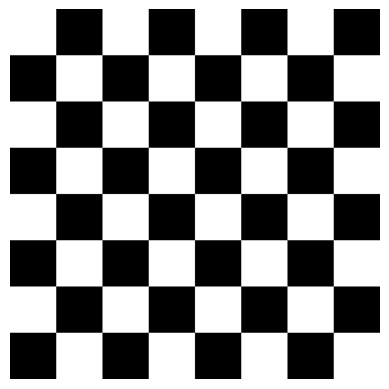

In [3]:
rows, cols = 8, 8 
cell_size = 100
HinhCaro = np.zeros((rows * cell_size, cols * cell_size), dtype=np.uint8)
for row in range(rows):
    for col in range(cols):
        if (row + col) % 2 == 0:
            HinhCaro[row * cell_size:(row + 1) * cell_size, col * cell_size:(col + 1) * cell_size] = 255
plt.imshow(HinhCaro, cmap='gray')
plt.axis('off') 
plt.show()

#### Color Corection

<>:1: SyntaxWarning: invalid escape sequence '\X'
<>:1: SyntaxWarning: invalid escape sequence '\X'
C:\Users\sangn\AppData\Local\Temp\ipykernel_14928\2140304217.py:1: SyntaxWarning: invalid escape sequence '\X'
  iname = "D:\Xu ly anh\Project 1\gr.jpg"


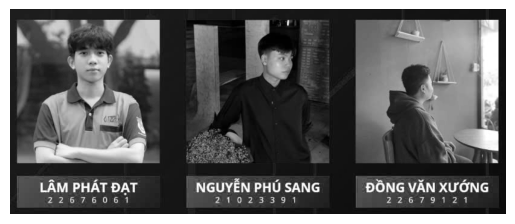

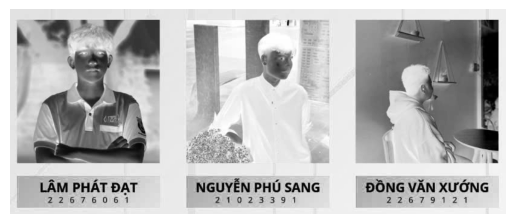

In [3]:
iname = "D:\Xu ly anh\Project 1\gr.jpg"
image = cv2.imread(iname)
grey_image = image[:,:,0]*0.07 + image[:,:,1]*0.72 + image[:,:,2]*0.21
plt.imshow(grey_image,cmap='gray')
plt.axis('off') 
plt.show()
minus_gi= 255-grey_image
plt.imshow(minus_gi,cmap='gray')
plt.axis('off') 
plt.show()

#### Rotate Image

<>:1: SyntaxWarning: invalid escape sequence '\X'
<>:1: SyntaxWarning: invalid escape sequence '\X'
C:\Users\sangn\AppData\Local\Temp\ipykernel_14928\3113179356.py:1: SyntaxWarning: invalid escape sequence '\X'
  iname = "D:\Xu ly anh\Project 1\gr.jpg"


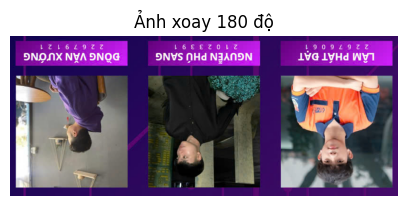

In [4]:
iname = "D:\Xu ly anh\Project 1\gr.jpg"
img = cv2.imread(iname)
def rotate_image(img, angle):
    height, width = img.shape[:2]  
    if angle == 90:
        rotated_img = np.zeros((width, height, img.shape[2]), dtype=np.uint8)
        for i in range(height):
            for j in range(width):
                rotated_img[j, height - i - 1] = img[i, j]
    elif angle == 180:
        rotated_img = np.zeros((height, width, img.shape[2]), dtype=np.uint8)
        for i in range(height):
            for j in range(width):
                rotated_img[height - i - 1, width - j - 1] = img[i, j]
    elif angle == 270:
        rotated_img = np.zeros((width, height, img.shape[2]), dtype=np.uint8)
        for i in range(height):
            for j in range(width):
                rotated_img[width - j - 1, i] = img[i, j]
    elif angle == 360 or angle == 0:
        rotated_img = img.copy()
    else:
        raise ValueError("Góc xoay phải là một trong các giá trị: 0, 90, 180, 270, 360")
    return rotated_img
angle = int(input("Nhập số độ xoay (0, 90, 180, 270, 360): "))
if angle not in [0, 90, 180, 270, 360]:
    print("Góc xoay không hợp lệ. Vui lòng nhập lại.")
else:
    rotated_img = rotate_image(img, angle)
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Ảnh xoay {angle} độ")
    plt.axis('off')
    plt.show()


#### Color Separation

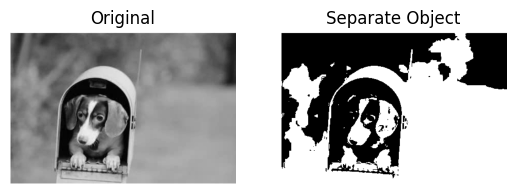

In [3]:
# Đọc ảnh dưới dạng nhị phân
img = cv2.imread('dog.jpg', 0)

# Đặt giá trị ngưỡng
thresh_value = 128
height, width = img.shape

# Tạo ảnh nhị phân bằng cách so sánh từng pixel với giá trị ngưỡng
binary_image = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        if img[i, j] > thresh_value:
            binary_image[i, j] = 255
        else:
            binary_image[i, j] = 0

# Hiển thị kết quả
plt.figure()
plt.subplot(121)
plt.title("Original")
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title("Separate Object")
plt.axis('off')
plt.imshow(binary_image, cmap='gray')

plt.show()


#### Corner Line

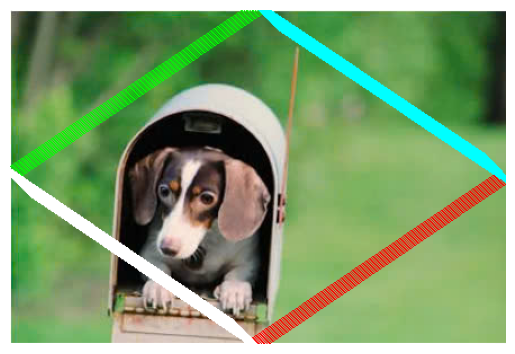

In [7]:
# Đọc ảnh
img = cv2.imread('dog.jpg')  # Đọc ảnh màu

# Lấy kích thước hình ảnh
height, width, channels = img.shape

# Tạo một ma trận mới để vẽ
new_img = np.copy(img)

def draw_thick_line(img, x1, y1, x2, y2, color, thickness):

    # Tính toán độ dốc và độ dài của đường thẳng
    dx = x2 - x1
    dy = y2 - y1
    steps = max(abs(dx), abs(dy))

    # Tính bước nhảy trên trục x và y
    x_inc = dx / steps
    y_inc = dy / steps

    # Vẽ từng điểm trên đường thẳng, lặp lại cho các đường song song
    for i in range(-thickness//2, thickness//2):
        x = x1 + i
        y = y1 + i
        for j in range(steps + 1):
            # Kiểm tra xem điểm có nằm trong phạm vi hình ảnh không
            if 0 <= x < img.shape[1] and 0 <= y < img.shape[0]:
                img[int(y), int(x)] = color
            x += x_inc
            y += y_inc

# Vẽ các đường kẻ
draw_thick_line(new_img, 0, height//2, width//2, 0, (0, 255, 0),10)  # Xanh lá
draw_thick_line(new_img, width, height//2, width//2, height, (0, 0, 255),10)  # Đỏ
draw_thick_line(new_img, width//2, 0, width, height//2, (255, 255, 0),40)  # Xanh dương
draw_thick_line(new_img, 0, height//2, width//2, height, (255, 255, 255),40)  # Trắng

# Hiển thị ảnh bằng matplotlib
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))  # Chuyển đổi từ BGR sang RGB
plt.axis('off')
plt.show()

#### Gradient

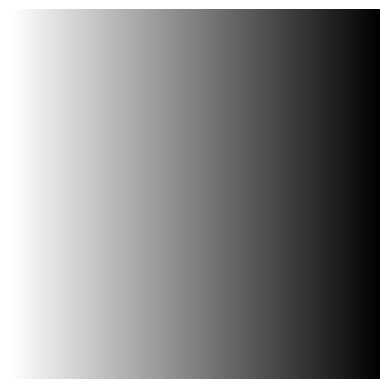

In [8]:
# Khởi tạo kích thước ảnh
height, width = 512, 512  # Đặt kích thước của ảnh là 512x512 pixel

# Tạo ảnh với gradient từ trắng sang đen theo chiều ngang
# Tạo một mảng ảnh với kích thước đã xác định, khởi tạo tất cả các pixel với giá trị 0 (đen)
gradient_img = np.zeros((height, width), dtype=np.uint8)

# Lặp qua từng pixel của ảnh để áp dụng gradient
for y in range(height):  # Duyệt qua từng hàng của ảnh
    for x in range(width):  # Duyệt qua từng cột của ảnh
        # Tính giá trị gradient cho từng pixel tại vị trí (y, x)
        # Tính giá trị x của pixel để điều chỉnh từ trắng (255) sang đen (0)
        gradient_img[y, x] = 255 - (255 * x // (width - 1))

# Hiển thị gradient bằng matplotlib
# Sử dụng matplotlib để hiển thị ảnh với màu xám (grayscale)
plt.imshow(gradient_img, cmap='gray')  # Hiển thị ảnh gradient với màu xám
plt.axis('off')  # Tắt các trục để chỉ hiển thị ảnh
plt.show()  # Hiển thị ảnh ra màn hình

#### Letter B

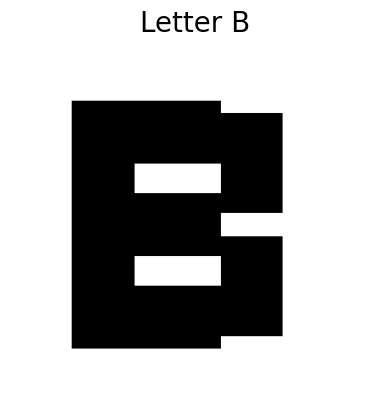

In [14]:
# Tạo một ảnh trống với kích thước 300x300 pixels, nền trắng
image = np.ones((300, 300, 3), dtype=np.uint8) * 255

# Tạo màu
mau_sac = (0, 0, 0)

# Vẽ phần thân trái của chữ "B"
for i in range(50, 251): 
    for j in range(50, 101):
        image[i, j] = mau_sac

# Vẽ phần thanh ngang trên của chữ "B"
for i in range(50, 101):  
    for j in range(70, 171):  
        image[i, j] = mau_sac

# Vẽ phần thanh ngang giữa của chữ "B"
for i in range(125, 176): 
    for j in range(70, 171):  
        image[i, j] = mau_sac

# Vẽ phần thanh ngang dưới của chữ "B"
for i in range(200, 251): 
    for j in range(70, 171): 
        image[i, j] = mau_sac

# Vẽ phần thân phải của chữ "B" phía trên
for i in range(60, 141):  
    for j in range(171, 221):  
        image[i, j] = mau_sac

# Vẽ phần thân phải của chữ "B" phía dưới
for i in range(160, 241):  
    for j in range(171, 221):  
        image[i, j] = mau_sac

# Hiển thị hình ảnh
plt.imshow(image)
plt.axis('off')
plt.title('Letter B', fontsize=20)
plt.show()

#### Find Secred By Subtract

<>:2: SyntaxWarning: invalid escape sequence '\X'
<>:3: SyntaxWarning: invalid escape sequence '\X'
<>:2: SyntaxWarning: invalid escape sequence '\X'
<>:3: SyntaxWarning: invalid escape sequence '\X'
C:\Users\sangn\AppData\Local\Temp\ipykernel_26924\2752535830.py:2: SyntaxWarning: invalid escape sequence '\X'
  image1 = cv2.imread('D:\Xu ly anh\Project 1\circle.png')
C:\Users\sangn\AppData\Local\Temp\ipykernel_26924\2752535830.py:3: SyntaxWarning: invalid escape sequence '\X'
  image2 = cv2.imread('D:\Xu ly anh\Project 1\star.png')


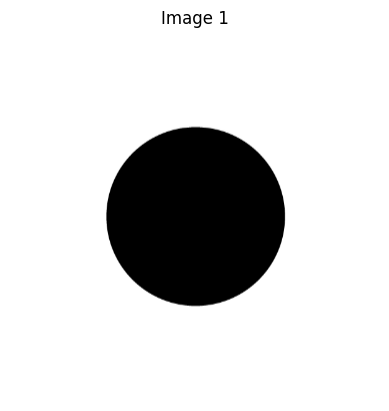

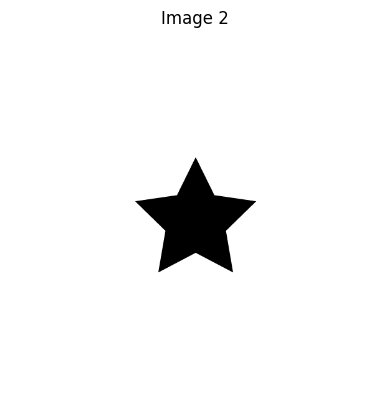

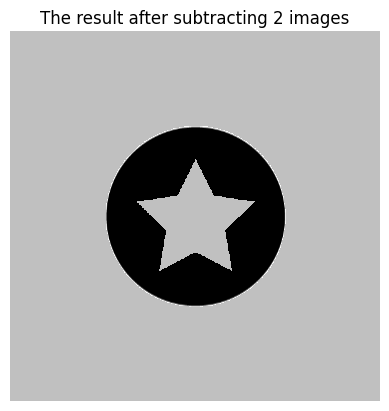

In [9]:
# Thêm ảnh để trừ
image1 = cv2.imread('D:\Xu ly anh\Project 1\circle.png') 
image2 = cv2.imread('D:\Xu ly anh\Project 1\star.png') 
plt.imshow(image1)
plt.title('Image 1')
plt.axis('off')
plt.show()
plt.imshow(image2)
plt.title('Image 2')
plt.axis('off')
plt.show()

# Kiểm tra kích thước 2 ảnh có cùng kích thước hay không
if image1.shape != image2.shape:
    raise ValueError("Hai hình ảnh phải có cùng kích thước")

# Khởi tạo một ảnh với nền trắng
result = np.full_like(image1, [192, 192, 192])

# Trừ 2 ảnh với nhau và giữ lại các phần riêng biệt của chúng
for i in range(image1.shape[0]):  
    for j in range(image1.shape[1]): 
        # So sánh từng kênh màu của pixel giữa hai ảnh
        # Nếu tất cả các kênh màu của một pixel từ image1 và image2 không bằng nhau, pixel đó từ image1 sẽ được giữ lại trong result.
        # Nền của result sẽ là màu đỏ ở những vị trí mà pixel của image1 và image2 giống nhau.
        if not (image1[i, j, 0] == image2[i, j, 0] and
                image1[i, j, 1] == image2[i, j, 1] and
                image1[i, j, 2] == image2[i, j, 2]): 
            result[i, j] = image1[i, j]  
# Hiển thị
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('The result after subtracting 2 images')
plt.show()